## Linear Regression
Dataset : https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [16]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_cols
df.sample(5)

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
4715,1118,11,22.9,57,1.4,1918,13.9,2.24,0.0,0.0,Yes
7096,1840,16,25.3,38,3.0,2000,9.9,1.88,0.0,0.0,Yes
4661,290,5,18.6,76,0.4,1957,14.2,0.00,0.0,0.0,Yes
3128,1702,8,9.6,38,1.4,1527,-4.0,0.58,0.0,0.0,Yes
2498,203,2,16.5,68,1.3,1724,10.5,0.00,0.0,0.0,Yes


In [17]:
df["functional"] = (df["functional"] == "Yes").astype(int)
df.sample(5)

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
1543,67,7,-8.8,58,4.0,1942,-15.5,0.0,0.0,0.3,1
4392,1165,0,20.9,53,1.4,1717,10.9,0.0,0.0,0.0,1
2285,80,5,-0.9,78,0.6,1687,-4.2,0.0,0.0,0.0,1
992,443,8,-12.6,61,1.6,1610,-18.5,0.0,0.0,0.0,1
6142,1635,22,29.9,60,1.3,2000,21.2,0.0,0.0,0.0,1


In [13]:
df = df[df["hour"]==12]
df.sample(5)

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
1644,188,12,-6.0,24,2.6,1964,-23.3,1.97,0.0,0.0,0
2412,666,12,9.2,40,2.6,592,-3.7,2.47,0.0,0.0,0
4956,1039,12,29.8,42,2.1,1220,15.5,2.90,0.0,0.0,0
1068,226,12,1.2,58,0.8,550,-6.1,0.74,0.0,0.0,0
3876,1161,12,20.0,47,1.4,685,8.3,3.08,0.0,0.0,0


In [18]:
df = df.drop(["hour"], axis=1)
df.sample(5)

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
4480,1434,28.8,38,3.1,1027,13.0,2.14,0.0,0.0,1
2169,160,0.1,78,4.9,615,-3.2,0.09,0.0,0.0,1
836,311,-2.8,39,1.7,1702,-14.8,0.00,0.0,0.0,1
4730,764,17.9,60,0.8,2000,10.0,0.00,0.0,0.0,1
3099,52,1.6,94,0.3,426,0.7,0.00,0.0,0.0,1


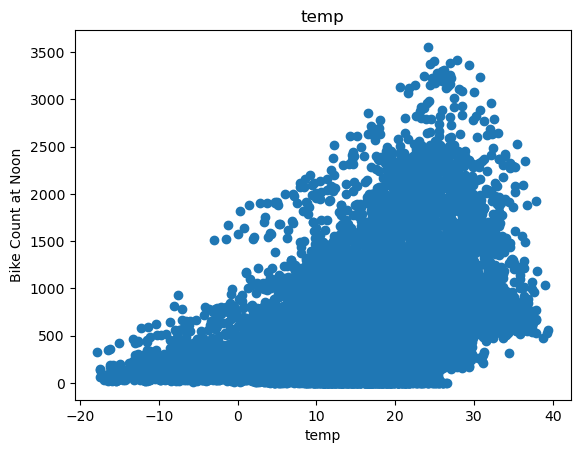

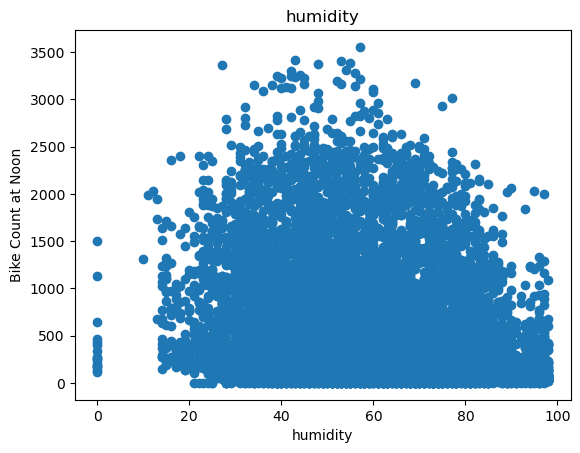

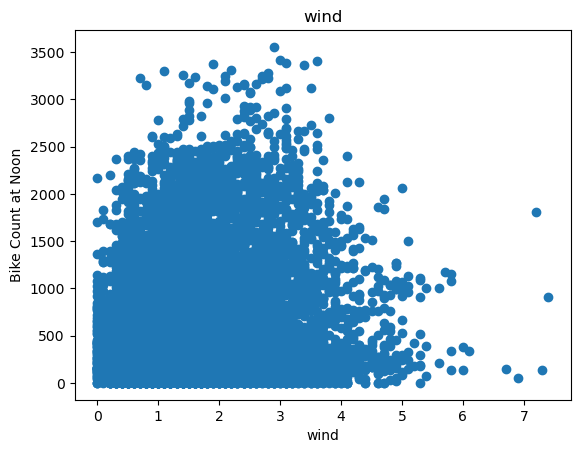

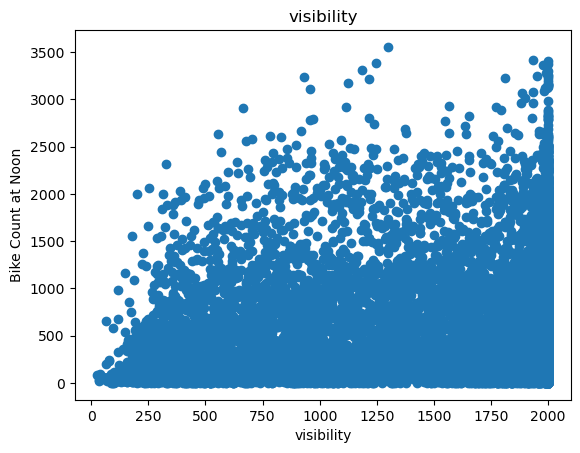

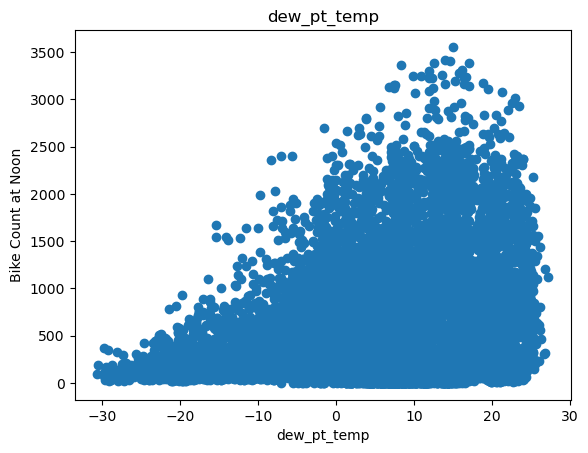

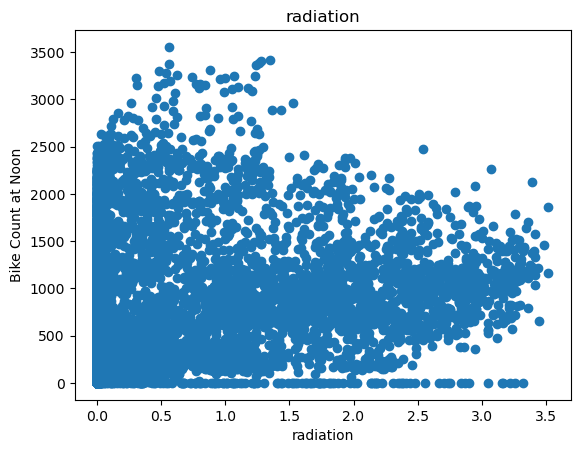

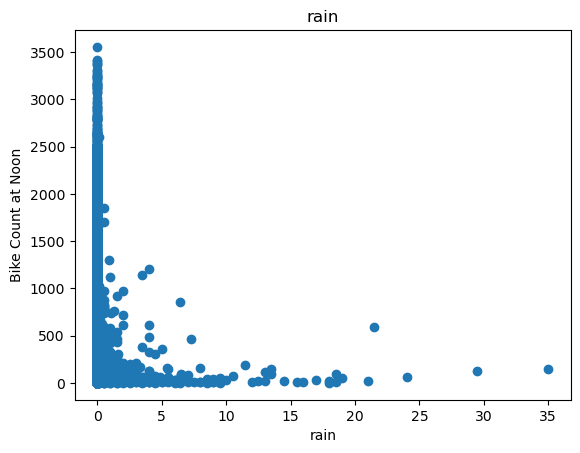

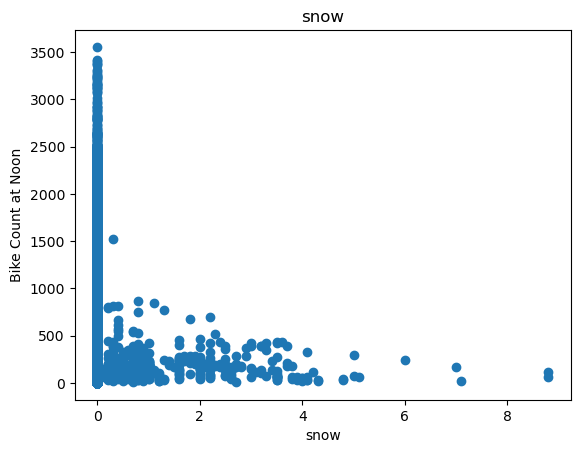

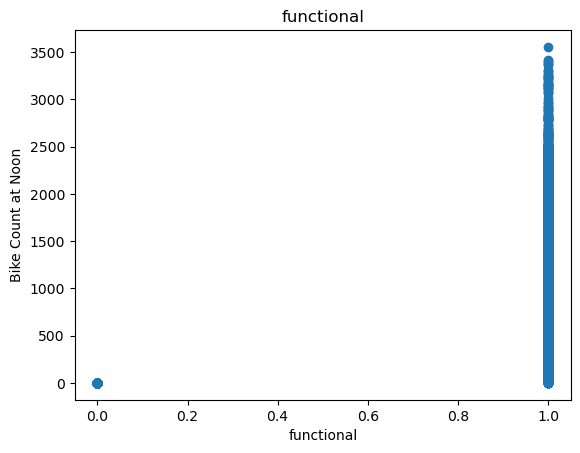

In [20]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [22]:
df = df.drop(["wind", "visibility", "functional"], axis = 1)


KeyError: "['wind', 'visibility', 'functional'] not found in axis"

In [23]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


## Train/Valid/Test datasets

In [24]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])

/home/amith/miniconda3/envs/apidev_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [36]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)

    data = np.hstack((X,y))

    return data,X,y



In [37]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [38]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [39]:
print(temp_reg.coef_, temp_reg.intercept_)

[[29.19472248]] [327.32966641]


In [40]:
temp_reg.score(X_test_temp, y_test_temp)

0.29670008227028244

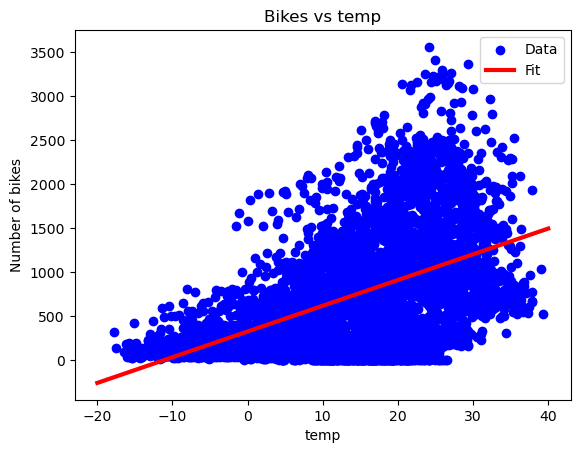

In [41]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("temp")
plt.show()

## Multiple Linear Regression

In [33]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [42]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/home/amith/miniconda3/envs/apidev_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [43]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [44]:
all_reg.score(X_test_all, y_test_all)

0.39229103473125815

## Regression but with a neural net

In [46]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/home/amith/miniconda3/envs/apidev_env/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
temp_nn_model = tf.keras.Sequential([temp_normalizer, tf.keras.layers.Dense(1)])

In [52]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [50]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [53]:
history = temp_nn_model.fit( X_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=100, validation_data=(X_val_temp, y_val_temp))

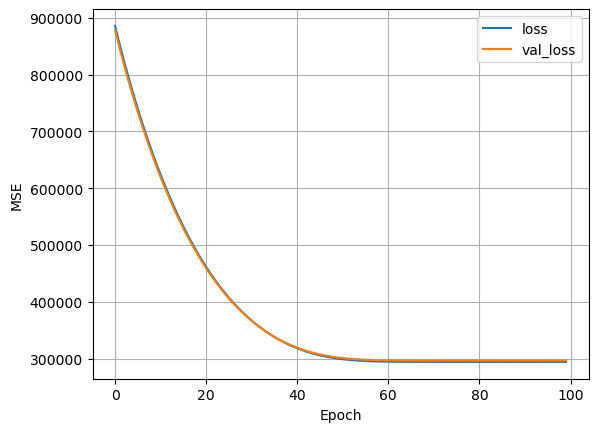

In [54]:
plot_loss(history)